In [1]:
# import packages
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['axes.linewidth'] = 2



In [2]:
# import the data
bikes = pd.read_csv('train.csv', index_col=0, parse_dates=True)
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [3]:
# In order to include the correlations from timestamp I will introduce new columns:
bikes['week'] = bikes.index.week
bikes['month'] = bikes.index.month
bikes['day'] = bikes.index.day
bikes['hour'] = bikes.index.hour
bikes['year'] = bikes.index.year
bikes['monthPERyear'] = bikes.index.month + (bikes['year']-2011)*12
bikes.head(2)
#bikes['day'].unique()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,week,month,day,hour,year,monthPERyear
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,52,1,1,0,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,52,1,1,1,2011,1


In [4]:
bikes['countLog'] = np.log10(bikes['count'])

In [5]:
df = bikes.drop(columns=['registered','casual','temp','year','month','count','humidity','season'])

In [6]:
df.head(1)

,holiday,workingday,weather,atemp,windspeed,week,day,hour,monthPERyear,countLog
datetime,,,,,,,,,,
2011-01-01,0,0,1,14.395,0.0,52,1,0,1,1.20412


In [7]:
# Change the only value weather =4 to 3 which is close!!
df.loc[df['weather'] == 4, 'weather'] = 3

# $\color{yellow}{\text{Exploratory Data Analysis + Feature Engineering }}$

- $\color{red}{\text{Import packages}}$

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Lasso 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import os
print(os.getcwd())

/Users/alexandros.samartzis/Spiced_Academy/stationary-sriracha-student-code/week_3/spiced_projects


- $\color{blue}{\text{Separate notebooks were created for the exploration of the data. }}$


- $\color{red}{\text{Split Data }}$


In [9]:
# create X and y
X = pd.DataFrame(df)
X.drop(columns = ['countLog'],inplace=True)
y = df['countLog']

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=42)

(10886, 9)
(10886,)


- $\color{red}{\text{Define the pipelines }}$


In [10]:
def pipe_scale(deg,scale,pos):

    pipe = Pipeline([
    ('polynomial_13', PolynomialFeatures(degree= deg, include_bias= True, interaction_only=False)),
    ])
    if scale ==True:
        pipe.steps.insert(pos-1,('num_scaler',MinMaxScaler()))
       
    return pipe

In [12]:
OHE_pipeline = Pipeline([
    ('OHE_pipe',OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore')),
])

In [37]:
column_transformer = ColumnTransformer([
    ('OHE_pipe',OHE_pipeline,['day','week','weather' ]), 
    ('poly_hour', pipe_scale(4,False,1), ["hour"]),    
    ('poly_monthPERyear',pipe_scale(6,False,1), ["monthPERyear"]), 
    ('atemp_pipe', pipe_scale(1,True,1), ["atemp"]), 
    ('wind_pipe', pipe_scale(2,True,1), ["windspeed"]), 
])

In [38]:
X_train_no_int = column_transformer.fit_transform(X_train) 
X_test_no_int = column_transformer.transform(X_test)

In [39]:
df_no_int=pd.DataFrame(X_train_no_int, columns=column_transformer.get_feature_names_out())
df_no_int.columns

Index(['OHE_pipe__day_2', 'OHE_pipe__day_3', 'OHE_pipe__day_4',
       'OHE_pipe__day_5', 'OHE_pipe__day_6', 'OHE_pipe__day_7',
       'OHE_pipe__day_8', 'OHE_pipe__day_9', 'OHE_pipe__day_10',
       'OHE_pipe__day_11', 'OHE_pipe__day_12', 'OHE_pipe__day_13',
       'OHE_pipe__day_14', 'OHE_pipe__day_15', 'OHE_pipe__day_16',
       'OHE_pipe__day_17', 'OHE_pipe__day_18', 'OHE_pipe__day_19',
       'OHE_pipe__week_2', 'OHE_pipe__week_3', 'OHE_pipe__week_5',
       'OHE_pipe__week_6', 'OHE_pipe__week_7', 'OHE_pipe__week_9',
       'OHE_pipe__week_10', 'OHE_pipe__week_11', 'OHE_pipe__week_12',
       'OHE_pipe__week_13', 'OHE_pipe__week_14', 'OHE_pipe__week_15',
       'OHE_pipe__week_16', 'OHE_pipe__week_17', 'OHE_pipe__week_18',
       'OHE_pipe__week_19', 'OHE_pipe__week_20', 'OHE_pipe__week_22',
       'OHE_pipe__week_23', 'OHE_pipe__week_24', 'OHE_pipe__week_25',
       'OHE_pipe__week_26', 'OHE_pipe__week_27', 'OHE_pipe__week_28',
       'OHE_pipe__week_29', 'OHE_pipe__week_31', 'OH

- $\color{red}{\text{Use Linear Regression as model }}$


In [40]:
m = LinearRegression()
m.fit(X_train_no_int,y_train)
m.score(X_train_no_int,y_train)
f' Train scores: LinReg {round(m.score(X_train_no_int,y_train),3)}'

' Train scores: LinReg 0.698'

In [41]:
m.score(X_test_no_int,y_test)
f' Test scores: LinReg {round(m.score(X_test_no_int,y_test),3)}'

' Test scores: LinReg 0.69'

In [42]:
y_pred = m.predict(X_test_no_int)

In [43]:
ypred_exp = np.exp(y_pred)

- $\color{red}{\text{Regularization}}$


In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [45]:
ridge.fit(X_train_no_int,y_train)
y_ridge = ridge.predict(X_train_no_int)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.92477e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [46]:
ridge.coef_

array([ 5.53550080e-02,  2.77106927e-02,  6.04838438e-02,  5.61506859e-02,
        5.32942804e-02,  4.63448340e-02,  8.85592415e-02,  6.81968031e-02,
        7.71876232e-02,  1.13614979e-01,  1.07361403e-01,  1.14842848e-01,
        1.32841340e-01,  1.81679450e-01,  1.85880756e-01,  2.28763557e-01,
        2.07864141e-01,  2.31778940e-01, -3.18206355e-02, -1.71297423e-01,
        9.10117041e-02,  6.35726229e-02, -1.60328218e-03,  5.22880776e-02,
        8.66672842e-02,  6.64431271e-02, -2.12295608e-02,  2.15476819e-01,
        1.35206407e-01,  5.91849186e-02,  1.60186364e-02,  2.61869163e-01,
        1.85416579e-01,  1.39270560e-01,  3.88980732e-03,  1.81205141e-01,
        1.15376313e-01,  2.62912308e-02, -6.93616630e-02,  1.18477729e-01,
        6.18656309e-02,  1.26620353e-02, -1.25629213e-01,  7.35130539e-02,
        2.39578402e-02, -8.15985333e-02,  1.10740840e-01, -2.93638253e-02,
       -2.56917093e-02, -1.71953997e-01,  1.43616596e-01,  1.10308398e-01,
        2.91730240e-02, -

- $\color{red}{\text{Cross-validation}}$


In [47]:
from sklearn.model_selection import cross_val_score  #Run cross-validation for single metric evaluation.

- - $\color{blue}{\text{Cross-validation for Train data}}$

In [48]:
cross_r2_lin = cross_val_score(ridge,   # estimator: # the model you want to evaluate 
                      X_train_no_int,         # the training input data 
                      y_train,         # the training output data  
                      cv=5,          # number of cross validation datasets, k-folds 
                      scoring='r2'
     )     # evaluation metric 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.17649e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.08061e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.18014e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.24514e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAl

In [49]:
print(cross_r2_lin)
print(f' Mean Cross validation score of train data: LinReg {round(cross_r2_lin.mean(),3)}')

[0.68958803 0.69130257 0.66857555 0.69592536 0.70298869]
 Mean Cross validation score of train data: LinReg 0.69


- - $\color{blue}{\text{Cross-validation for Test data}}$

In [50]:
cross_r2_lin = cross_val_score(ridge,   # estimator: # the model you want to evaluate 
                      X_test_no_int,         # the training input data 
                      y_test,         # the training output data  
                      cv=5,          # number of cross validation datasets, k-folds 
                      scoring='r2'
     )     # evaluation metric 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.40701e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.08746e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.13699e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.87759e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAl

In [51]:
print(cross_r2_lin)
print(f' Mean Cross validation score of train data: LinReg {round(cross_r2_lin.mean(),3)}')

[0.71062891 0.70243898 0.65517863 0.67458396 0.68945609]
 Mean Cross validation score of train data: LinReg 0.686


# -  $\color{red}{\text{Mean Square Log Error}}$

In [60]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(X_test_no_int, y_ridge)


ValueError: y_true and y_pred have different number of output (82!=1)

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X_test_no_int, y_ridge)

ValueError: y_true and y_pred have different number of output (82!=1)

In [62]:
X_train['ypred'] = ridge.predict(X_train_no_int)
X_train['ytrue'] = y_train

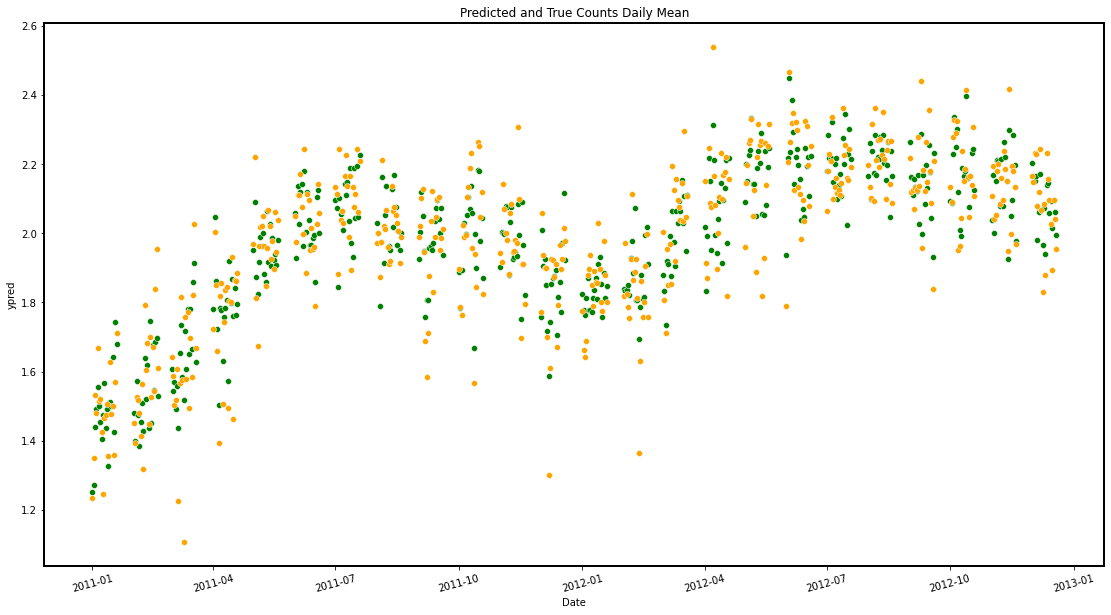

In [63]:
plt.figure(figsize=(19,10))
sns.scatterplot(data =X_train.resample('D').mean(), x = 'datetime', y = 'ypred', color = 'green')
sns.scatterplot(data =X_train.resample('D').mean(), x = 'datetime', y = 'ytrue', color = 'orange' )
plt.xticks(rotation=15)
#plt.ylabel('Counts')
plt.xlabel('Date')
plt.title('Predicted and True Counts Daily Mean')
plt.show()

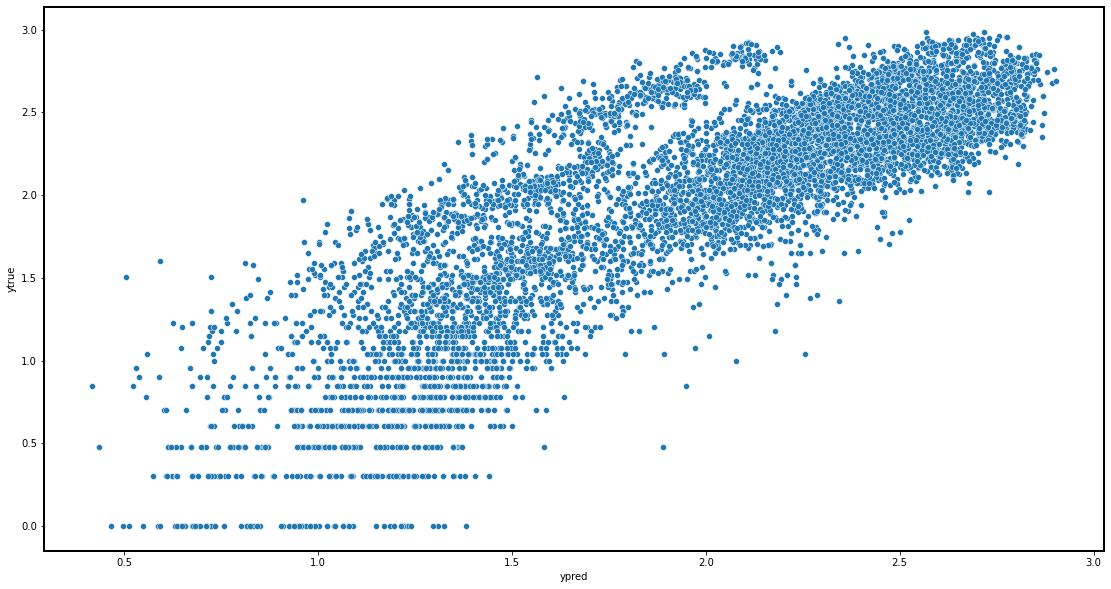

In [64]:
plt.figure(figsize=(19,10))
sns.scatterplot(data =X_train, y ='ytrue',  x ='ypred', )
#sns.barplot(data =X_train, x = 'hour', )
#plt.xlabel('Hour of the Day')
#plt.ylabel('Counts')
#plt.title('Counts per hour o the day or working days and weekends')
plt.show()

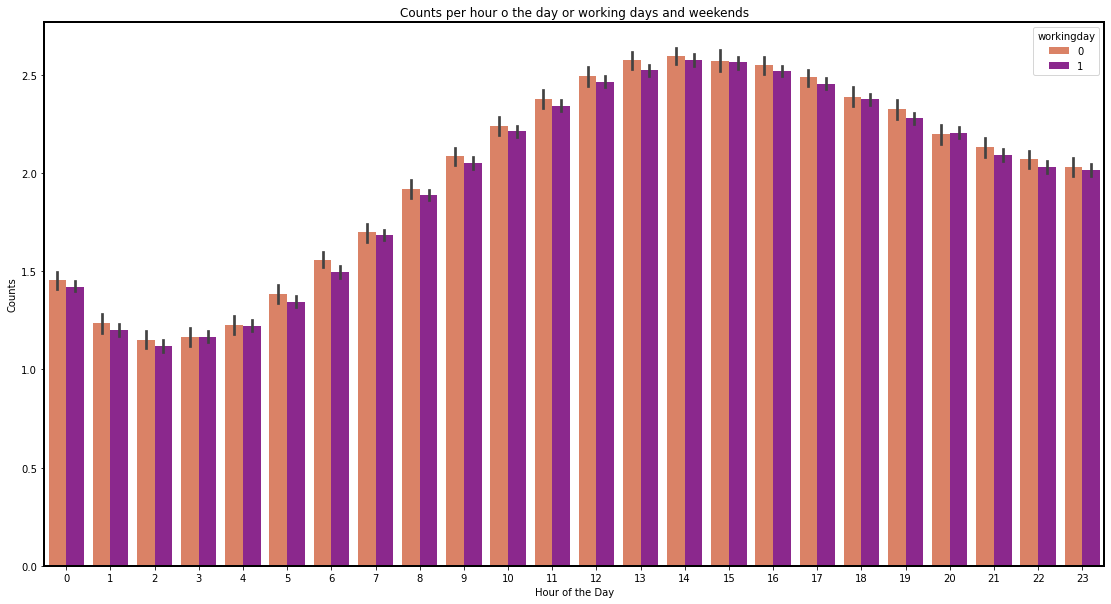

In [65]:
plt.figure(figsize=(19,10))
#sns.barplot(data =X_train, x = 'hour', y ='ytrue', hue = 'workingday', palette='plasma_r', )
sns.barplot(data =X_train, x = 'hour', y ='ypred', hue = 'workingday', palette='plasma_r', )
plt.xlabel('Hour of the Day')
plt.ylabel('Counts')
plt.title('Counts per hour o the day or working days and weekends')
plt.show()

# -  $\color{red}{\text{Kaggle}}$

In [52]:
df_k = pd.read_csv('test.csv', index_col=0, parse_dates=True)
df_k.shape

(6493, 8)

In [53]:
df_k.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# FE for test data 

In [54]:
df_k['week'] = df_k.index.week
df_k['month'] = df_k.index.month
df_k['day'] = df_k.index.day
df_k['hour'] = df_k.index.hour
df_k['year'] = df_k.index.year
df_k['monthPERyear'] = df_k.index.month + (df_k['year']-2011)*12
df_k.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,week,month,day,hour,year,monthPERyear
datetime,,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,3,1,20,0,2011,1
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,1,20,1,2011,1


In [55]:
dfk = df_k.drop(columns=['temp','year','month','humidity','season'])
dfk.loc[dfk['weather'] == 4, 'weather'] = 3

In [56]:
X_kag = column_transformer.transform(dfk)
kag_pred = m.predict(X_kag)
y_Kaggle=np.exp(kag_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [57]:
final = pd.read_csv('sampleSubmission.csv', index_col=0, parse_dates=True)
final['count'] = y_Kaggle
pd.DataFrame(final).to_csv("bikes_predictions")